In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
style.use('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from datetime import date
import matplotlib.mlab as mlab

In [6]:
# create engine to hawaii.sqlite
hawaii_engine = create_engine("sqlite:///resources/hawaii.sqlite")
hawaii_conn = hawaii_engine.connect()

In [7]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(hawaii_engine, reflect = True)

Base.classes.keys()

['measurement', 'station']

In [8]:
#Source: https://docs.sqlalchemy.org/en/14/orm/extensions/automap.html

# reflect the tables

Base.prepare(hawaii_engine, reflect= True)

C:\Users\mom\anaconda3\lib\site-packages\sqlalchemy\orm\clsregistry.py:176: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.measurement, and will be replaced in the string-lookup table.
  util.warn(
C:\Users\mom\anaconda3\lib\site-packages\sqlalchemy\orm\clsregistry.py:176: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.station, and will be replaced in the string-lookup table.
  util.warn(


In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
#https://docs.sqlalchemy.org/en/14/orm/extensions/automap.html
measurement = Base.classes.measurement
station = Base.classes.station


In [11]:
# Create our session (link) from Python to the DB
session = Session(hawaii_engine)

# Exploratory Precipitation Analysis

In [12]:
# Import Inspector
inspector = inspect(hawaii_engine)


In [13]:
# Get column names for measurement.csv
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Get column names for station.csv
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
#view first 10 rows measurement
hawaii_engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [16]:
#view first 10 rows station
hawaii_engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [17]:
# Find the most recent date in the data set.
# Source In class example


recent = session.query(measurement.date).order_by(measurement.date.desc()).first()

recent

('2017-08-23',)

In [18]:
pd.read_csv("Resources/hawaii_measurements.csv")

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71
19546,USC00516128,2017-08-20,NaN,78
19547,USC00516128,2017-08-21,0.56,76
19548,USC00516128,2017-08-22,0.50,76


In [19]:
pd.read_csv('Resources/hawaii_stations.csv')

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


Text(0, 0.5, 'Precipitation(inches)')

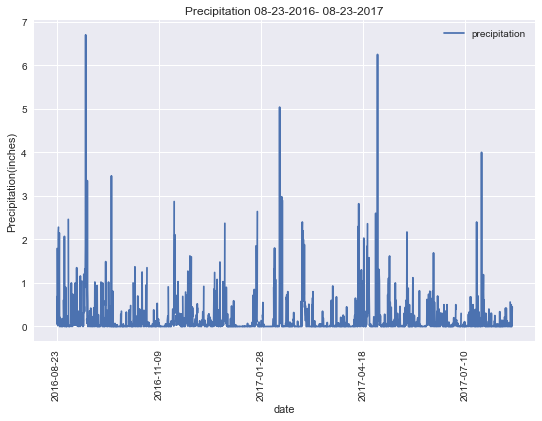

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#Source: In class examples / https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot/27520877

prior_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
query_d_p = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prior_year).all()
new_df = pd.DataFrame(query_d_p, columns=['date', 'precipitation'])
new_df.set_index(new_df['date'], inplace = True)
df = new_df.sort_index()
ax = df.plot(rot = 90, title='Precipitation 08-23-2016- 08-23-2017')
ax.set_ylabel("Precipitation(inches)")

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
df[["date", "precipitation"]].describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
#source: in class examples

session.query(func.count(station.station)).all()

[(9,)]

In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#Source: In class examples

session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, 
#calculate the lowest, highest, and average temperature.

# SELECT station
# FROM measurement
# WHERE station = 'USC00519281'



sel = [measurement.station,
       func.max(measurement.tobs),
       func.min(measurement.tobs),
       func.avg(measurement.tobs)]
    
stats = session.query(*sel).\
    filter(measurement.station == 'USC00519281').\
    group_by(measurement.station).\
    order_by(measurement.tobs)
print(stats)

stats = stats.all()

stats

SELECT measurement.station AS measurement_station, max(measurement.tobs) AS max_1, min(measurement.tobs) AS min_1, avg(measurement.tobs) AS avg_1 
FROM measurement 
WHERE measurement.station = ? GROUP BY measurement.station ORDER BY measurement.tobs


[('USC00519281', 85.0, 54.0, 71.66378066378067)]

In [25]:
stats_df = pd.DataFrame(stats, columns=["station", "max temp", "min temp", "avg temp"])
stats_df.set_index('station', inplace = True)
stats_df

,max temp,min temp,avg temp
station,,,
USC00519281,85.0,54.0,71.663781


Text(0.5, 1.0, 'Frequency of Temperature for Station USC00519281 08/23/2016-08/23/2017')

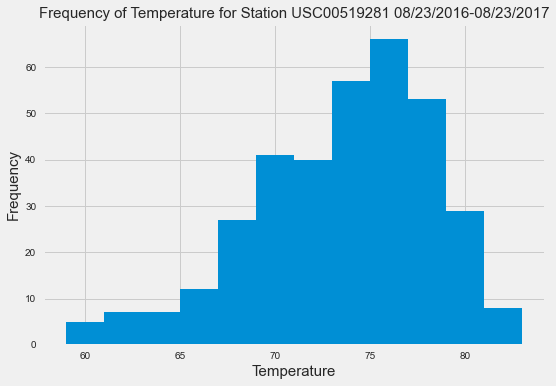

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
#and plot the results as a histogram
prior_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
query_d_t = session.query(measurement.date, measurement.tobs).\
    filter(measurement.date >= prior_year).\
    filter(measurement.station == 'USC00519281').all()

# List comprehension solution
d_t_rows = [{"date": result[0], "temperature": result[1]} for result in query_d_t]  
d_t_rows
    

new_dt_df = pd.DataFrame(d_t_rows).set_index("date")
new_dt_df

style.use('fivethirtyeight')

# new_dt_df.groupby([new_dt_df["date"].dt.year, new_dt_df["date"].dt.month]).count().plot(kind="hist")
new_dt_df.hist(bins=12)


plt.xlabel('Temperature',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Frequency of Temperature for Station USC00519281 08/23/2016-08/23/2017',fontsize=15)

# Close session

In [82]:
#def start():
    #start_date = dt.datetime(2014, 8, 13)

    session = Session(hawaii_engine)
    sel = [measurement.date,
        func.max(measurement.tobs),
        func.min(measurement.tobs),
        func.avg(measurement.tobs)]
    start_date = session.query(*sel).\
        filter(measurement.date).\
        group_by(measurement.date).\
        order_by(measurement.date).all()
    jsonify(start_date)   



#     all_start = []
#     for date, maximum, minimum, avg, tobs in start_date:
#         start_dict = {}
#         start_dict["date"] = date
#         start_dict["maximum"] = maximum
#         start_dict["minimum"] = minimum
#         start_dict["average"] = average
#         start_dict["tobs"] = tobs
#         all_start.append(start_dict)
#     return jsonify(all_start)
        
#     filter(measurement.date >= start_date).filter(measurement.tobs).all()
#     session.close()
#     sd_rows = [{"date": result[0], "max temperature": result[1], "Min temperature": result[2], "Average temperature": result[3]} for result in sd_averages]  

   
# first = session.query(measurement.date).order_by(measurement.date.asc()).first()

# first
    

[('2010-01-01', 75.0, 65.0, 69.71428571428571),
 ('2010-01-02', 75.0, 61.0, 67.0),
 ('2010-01-03', 77.0, 67.0, 74.0),
 ('2010-01-04', 76.0, 72.0, 75.0),
 ('2010-01-05', 76.0, 73.0, 74.5),
 ('2010-01-06', 76.0, 71.0, 73.33333333333333),
 ('2010-01-07', 74.0, 68.0, 70.42857142857143),
 ('2010-01-08', 73.0, 63.0, 65.57142857142857),
 ('2010-01-09', 70.0, 67.0, 68.57142857142857),
 ('2010-01-10', 75.0, 70.0, 72.71428571428571),
 ('2010-01-11', 72.0, 64.0, 66.71428571428571),
 ('2010-01-12', 68.0, 57.0, 61.57142857142857),
 ('2010-01-13', 68.0, 57.0, 61.5),
 ('2010-01-14', 69.0, 65.0, 66.42857142857143),
 ('2010-01-15', 69.0, 56.0, 64.83333333333333),
 ('2010-01-16', 71.0, 65.0, 67.33333333333333),
 ('2010-01-17', 70.0, 64.0, 68.0),
 ('2010-01-18', 77.0, 70.0, 73.0),
 ('2010-01-19', 75.0, 61.0, 69.42857142857143),
 ('2010-01-20', 72.0, 66.0, 67.85714285714286),
 ('2010-01-21', 71.0, 68.0, 69.5),
 ('2010-01-22', 67.0, 60.0, 63.5),
 ('2010-01-23', 78.0, 67.0, 73.83333333333333),
 ('2010-01-24

In [47]:
# Close Session
session.close()